In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import stft

# Raw list of complex numbers where the complex part ends in "i".
raw_data: pd.DataFrame = pd.read_csv("data/csv/ZBW_SNR30.csv", sep=",", header=None, dtype=str)

# Map the raw data into a numpy array of complex numbers.
# 
# The "i" in each row must be replaced with "j" because Python uses the engineering convention for
# representing complex numbers.
data: np.ndarray[complex] = raw_data.map(lambda row: np.csingle(row.replace('i', 'j')))[0]

data = data[:200000]

# Sampling frequency
fs = 1  # Hz

# Calculate Short Time Fourier Transform of the signal. Sxx is the naming convention for the
# Power Spectral Density.
f, t, Sxx = stft(x=data, fs=fs, return_onesided=False)

Sxx_abs = (np.abs(Sxx) ** 2) * 10000000

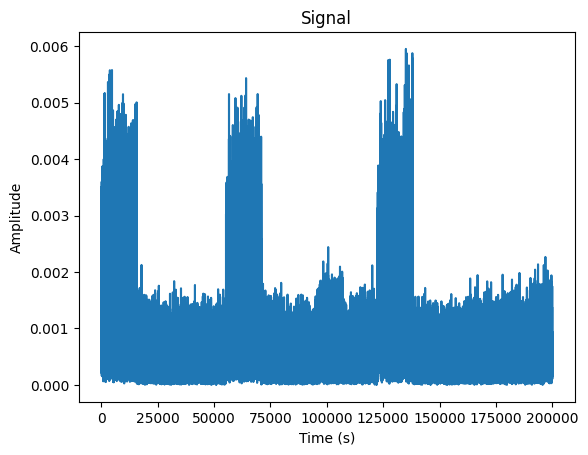

In [2]:
plt.plot(np.abs(data))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

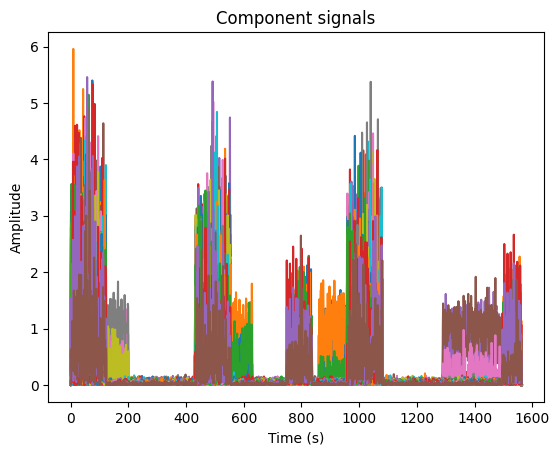

In [3]:
plt.plot(Sxx_abs.T)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Component signals')
plt.show()

(256,)
(1564,)
(256, 1564)


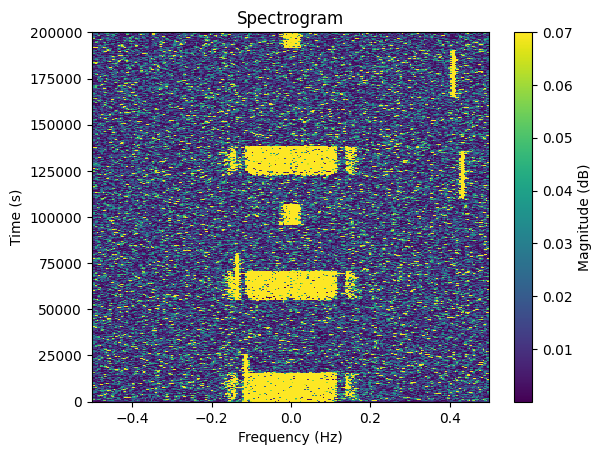

In [4]:
f = np.sort(f)

print(f.shape)
print(t.shape)
print(Sxx_abs.shape)

l = len(Sxx_abs)
Sxx_abs = np.concatenate((Sxx_abs[l // 2:], Sxx_abs[:l // 2]))

# Plot spectrogram
# Pass frequencies and time values for the X, Y values for the color mesh.
plt.pcolormesh(f, t, np.clip(Sxx_abs, 0, 0.07).T, shading="nearest")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Magnitude (dB)')
plt.show()